In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('USA_Housing.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
# statistical data about the dataframe
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Some simple plots for EDA

In [ ]:
sns.pairplot(df, palette='nipy_spectral')

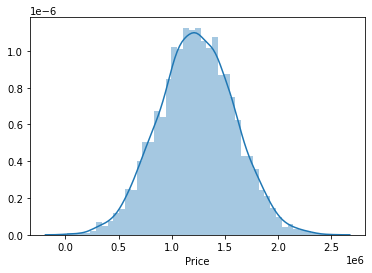

In [8]:
# check out the distribution of the column you are trying to predict
sns.distplot(df['Price'], ) 

## Check data correlation with a heatmap


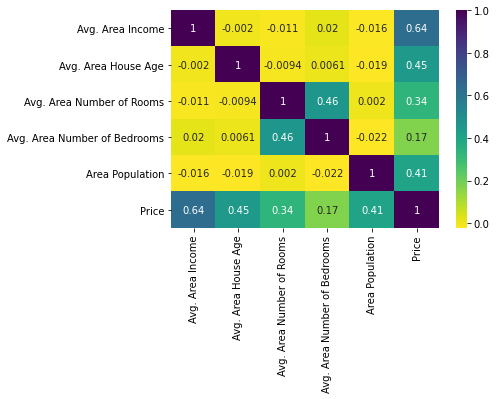

In [26]:
sns.heatmap(df.corr(), cmap='viridis_r', annot=True, ) # diagonal perfectly correlated

In [17]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### Insert the features and y = the outcome we want:

In [27]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [28]:
y=df['Price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
# test_size = percentage attributade for testing
# random = ensures a specific set of random split

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train, y_train) # fit the model on the training data, fits the linear model

LinearRegression()

#### Check coefficients and how to interpret them


In [37]:
print(lm.intercept_)

-2640159.796851911


In [38]:
lm.coef_ # each coeff relates to the X train columns

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [42]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']) # coef = data, colums = index

In [43]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


cdf : If we hold all, *a one unit increase* in *average area income* associated in 21,52 dollar increase in prince. And so on.

###### Grab real data:

In [44]:
from sklearn.datasets import load_boston


In [45]:
boston = load_boston()

In [50]:
#print(boston['DESCR'])
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [53]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [58]:
predictions = lm.predict(X_test)

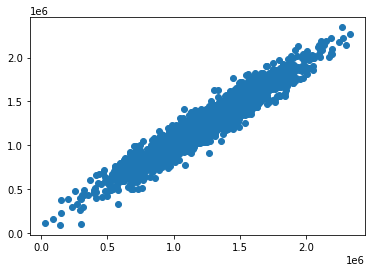

In [60]:
plt.scatter(y_test,predictions)

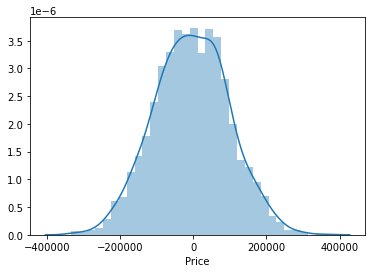

In [63]:
sns.distplot((y_test-predictions)) # histogram of the residuals

The linear regression model was a correct choice.
Three regression evaluation matrix, MAE, MSE, RMSE (absolute, squared, root of the squared)
All of those are loss functions that we need to minimize.


In [64]:
from sklearn import metrics

In [65]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914957

In [66]:
metrics.mean_squared_error(y_test,predictions)

10460958907.209501

In [67]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291153